In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df=pd.read_csv("energy_dataset.csv")
df1 = pd.read_csv("weather_features1.csv")



In [3]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])
df1['time'] = pd.to_datetime(df1['time'])

# Drop the 'city_name' column
df1 = df1.drop(columns=['city_name'])

# Define aggregation functions including mode calculation
aggregation_functions = {
    "temp": 'mean',
    "temp_min": 'mean',
    "temp_max": 'mean',
    "pressure": 'mean',
    "humidity": 'mean',
    "wind_speed": 'mean',
    "wind_deg": 'mean',
    "rain_1h": 'mean',
    "rain_3h": 'mean',
    "snow_3h": 'mean',
    "clouds_all": 'mean',
    "weather_id": 'mean',
    "weather_main": lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None,
    "weather_description": lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None,
    "weather_icon": lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None
}

# Aggregate the dataset by 'time' column
df2= df1.groupby('time').agg(aggregation_functions).reset_index()




C:\Users\Prachi\AppData\Local\Temp\ipykernel_2976\1975247615.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['time'] = pd.to_datetime(df['time'])
C:\Users\Prachi\AppData\Local\Temp\ipykernel_2976\1975247615.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df1['time'] = pd.to_datetime(df1['time'])


In [4]:
merged_dataset = pd.merge(df,df2,on='time', how='left')

In [5]:
df3 = merged_dataset


In [6]:
df3.shape

(35064, 44)

In [7]:
df3.head

<bound method NDFrame.head of                             time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...            

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [9]:
# Correct way to drop specific columns from a DataFrame
df3 = df3.drop(columns=["generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"])


In [10]:
df3.shape

(35064, 42)

In [11]:
#here this function is called for the null value count
null_counts = df3.isnull().sum()
null_counts



time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18


In [12]:
df3 = df3.fillna(method='bfill')

# Check for remaining NaNs after backfill
print("\nNaN counts after backfill:")
print(df3.isna().sum())


NaN counts after backfill:
time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                 

C:\Users\Prachi\AppData\Local\Temp\ipykernel_2976\114325370.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3 = df3.fillna(method='bfill')


In [13]:
#removing the columns containg zeros value
numeric_cols = df3.select_dtypes(include=['number']).columns

# Identify columns where the sum of all numbers is zero
columns_with_sum_zero = numeric_cols[df3[numeric_cols].sum() == 0].tolist()

# Remove these columns
df4 = df3.drop(columns=columns_with_sum_zero)


In [14]:
df4.shape

(35064, 36)

In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation hydro pumped storage consumption  35064 non-null  float64
 7   generation hydro run-of-river and poundage   35064 non-null  float64
 8   generation hydro water reservoir             35064 non-null  float64
 9   generation nuclear                           35064 non-null  float64
 10

In [16]:
# Original price (assuming 'price' column contains original prices)
original_prices = df4['price actual']

# Impute missing prices (mean imputation in this example)
mean_price = df4['price actual'].mean()
df4['imputed_price'] = df4['price actual'].fillna(mean_price)

print("Original Prices:")
print(original_prices)
print("\nImputed Prices:")
print(df4['imputed_price'])



Original Prices:
0        65.41
1        64.92
2        64.48
3        59.32
4        56.04
         ...  
35059    77.02
35060    76.16
35061    74.30
35062    69.89
35063    69.88
Name: price actual, Length: 35064, dtype: float64

Imputed Prices:
0        65.41
1        64.92
2        64.48
3        59.32
4        56.04
         ...  
35059    77.02
35060    76.16
35061    74.30
35062    69.89
35063    69.88
Name: imputed_price, Length: 35064, dtype: float64


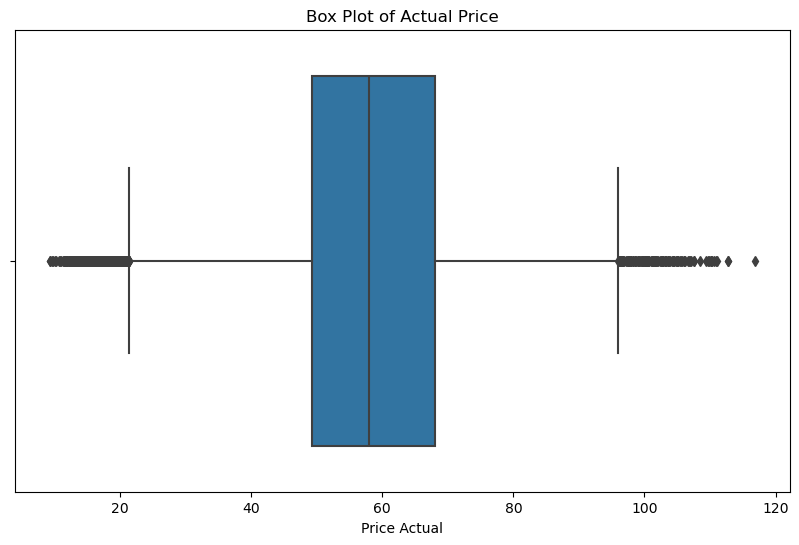

In [17]:
mean_price = df4['price actual'].mean()

# Impute missing prices with the mean
df4['imputed_price'] = df4['price actual'].fillna(mean_price)

# Plotting the box plot for 'price actual'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df4['price actual'])
plt.title('Box Plot of Actual Price')
plt.xlabel('Price Actual')
plt.show()

In [18]:

# Select only numeric columns
numeric_df = df4.select_dtypes(include=['number'])

# Calculate the IQR for each numeric column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

print("Outliers in DataFrame:\n", outliers)

# Optionally, remove outliers by setting them to NaN
df_no_outliers = numeric_df.mask(outliers)

# Combine the numeric DataFrame with outliers removed back with the non-numeric columns
df_no_outliers = pd.concat([df_no_outliers, df4.select_dtypes(exclude=['number'])], axis=1)

print("DataFrame after removing outliers:\n", df_no_outliers)


Outliers in DataFrame:
        generation biomass  generation fossil brown coal/lignite  \
0                   False                                 False   
1                   False                                 False   
2                   False                                 False   
3                   False                                 False   
4                   False                                 False   
...                   ...                                   ...   
35059               False                                 False   
35060               False                                 False   
35061               False                                 False   
35062               False                                 False   
35063               False                                 False   

       generation fossil gas  generation fossil hard coal  \
0                      False                        False   
1                      False                     

 <span style="font-size: larger;">feature engineering</span>.

categorize the high peak and off peak time

In [19]:
df4["time"] = pd.to_datetime(df4["time"],utc = True)

# Sort DataFrame by time
df4 = df4.sort_values('time')

# Function to categorize peak status based on average of adjacent times
def categorize_time(hour, prev_hour, next_hour):
    if prev_hour is None:
        avg_hour = next_hour
    elif next_hour is None:
        avg_hour = prev_hour
    else:
        avg_hour = (prev_hour + next_hour) / 2
    
    if hour > avg_hour:
        return 'high_peak'
    else:
        return 'off_peak'

# Calculate previous and next hours for each row
df4['prev_hour'] = df4['time'].shift(1).dt.hour
df4['next_hour'] = df4['time'].shift(-1).dt.hour

# Apply categorization function to create 'peak_status' column
df4['peak_status'] = df4.apply(lambda row: categorize_time(row['time'].hour, row['prev_hour'], row['next_hour']), axis=1)

# Drop intermediate columns used for calculation
df4 = df4.drop(['prev_hour', 'next_hour'], axis=1)

df4['high_peak'] = (df4['peak_status'] == 'high_peak').astype(int)
df4['off_peak'] = (df4['peak_status'] == 'off_peak').astype(int)

# Print DataFrame with 'time', 'high_peak', and 'off_peak' columns
print(df4[['time', 'high_peak', 'off_peak']])

                           time  high_peak  off_peak
0     2014-12-31 23:00:00+00:00          0         1
1     2015-01-01 00:00:00+00:00          0         1
2     2015-01-01 01:00:00+00:00          0         1
3     2015-01-01 02:00:00+00:00          0         1
4     2015-01-01 03:00:00+00:00          0         1
...                         ...        ...       ...
35059 2018-12-31 18:00:00+00:00          0         1
35060 2018-12-31 19:00:00+00:00          0         1
35061 2018-12-31 20:00:00+00:00          0         1
35062 2018-12-31 21:00:00+00:00          0         1
35063 2018-12-31 22:00:00+00:00          0         1

[35064 rows x 3 columns]


categorize the weekdays and weekend

In [20]:

# Function to categorize weekdays and weekends
def categorize_weekday_weekend(day):
    if day < 5:  
        return 'weekday'
    else:
        return 'weekend'

# Apply the function to create the 'day_type' column
df4['day_type'] = df4['time'].dt.dayofweek.apply(categorize_weekday_weekend)

# Count the number of days in each category
day_type_counts = df4['day_type'].value_counts()
print("Day Type Counts:")
print(day_type_counts)

# Create separate columns for weekdays and weekends
df4['weekday'] = (df4['time'].dt.dayofweek < 5).astype(int)
df4['weekend'] = (df4['time'].dt.dayofweek >= 5).astype(int)

# Extract day names from the 'time' column
df4['day_name'] = df4['time'].dt.day_name()

# One-hot encode the 'day_name' column
df4 = pd.get_dummies(df4, columns=['day_name'])

# Display the DataFrame with one-hot encoded day names
print("\nDataFrame with Day Names:")
print(df4[['time', 'weekday', 'weekend', 'day_name_Monday', 'day_name_Tuesday', 'day_name_Wednesday', 'day_name_Thursday', 'day_name_Friday', 'day_name_Saturday', 'day_name_Sunday']].head())

# Count the number of days for each day of the week
day_type_counts = df4.filter(like='day_name_').sum()
print("\nDay counts:")
print(day_type_counts)


Day Type Counts:
day_type
weekday    25032
weekend    10032
Name: count, dtype: int64

DataFrame with Day Names:
                       time  weekday  weekend  day_name_Monday  \
0 2014-12-31 23:00:00+00:00        1        0            False   
1 2015-01-01 00:00:00+00:00        1        0            False   
2 2015-01-01 01:00:00+00:00        1        0            False   
3 2015-01-01 02:00:00+00:00        1        0            False   
4 2015-01-01 03:00:00+00:00        1        0            False   

   day_name_Tuesday  day_name_Wednesday  day_name_Thursday  day_name_Friday  \
0             False                True              False            False   
1             False               False               True            False   
2             False               False               True            False   
3             False               False               True            False   
4             False               False               True            False   

   day_name_Sat

one hot encoding for extract the months

In [21]:
# Extract month names from the 'time' column
df4['month_name'] = df4['time'].dt.month_name()

# One-hot encode the 'month_name' column only if columns don't already exist
if 'month_name' in df4.columns:
    df4 = pd.get_dummies(df4, columns=['month_name'])

# Display the DataFrame with one-hot encoded month names
print("\nDataFrame with Month Names:")
print(df4.head())

# Count the number of days for each month
month_count = df4.filter(like='month_name_').sum()
print("\nMonth counts:")
print(month_count)

# Determine high season and off-season months
high_season_months = month_count[month_count >= month_count.mean()]
off_season_months = month_count[month_count < month_count.mean()]

print("\nHigh Season Months:")
print(high_season_months.index.tolist())

print("\nOff-Season Months:")
print(off_season_months.index.tolist())



DataFrame with Month Names:
                       time  generation biomass  \
0 2014-12-31 23:00:00+00:00               447.0   
1 2015-01-01 00:00:00+00:00               449.0   
2 2015-01-01 01:00:00+00:00               448.0   
3 2015-01-01 02:00:00+00:00               438.0   
4 2015-01-01 03:00:00+00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0         

categorization of weather description

In [22]:


# Dictionary mapping weather categories
weather_categories = {
    'Clear': ['clear sky'],
    'Cloudy': ['few clouds', 'scattered clouds', 'broken clouds'],
    'Rainy': ['shower rain', 'rain'],
    'Stormy': ['thunderstorm'],
    'Snowy': ['snow'],
    'Foggy': ['mist', 'fog'],
    'Other': []  # Add any other categories as needed
}

# Function to categorize weather descriptions
def categorize_weather(description, categories):
    for category, keywords in categories.items():
        if any(keyword in description.lower() for keyword in keywords):
            return category
    return 'Other'  # Default category if no match found

# Apply categorization function to create 'weather_category' column
df4['weather_category'] = df4['weather_description'].apply(lambda x: categorize_weather(x, weather_categories))

print(df4[['weather_description', 'weather_category']])


      weather_description weather_category
0            sky is clear            Other
1            sky is clear            Other
2            sky is clear            Other
3            sky is clear            Other
4            sky is clear            Other
...                   ...              ...
35059        sky is clear            Other
35060        sky is clear            Other
35061        sky is clear            Other
35062        sky is clear            Other
35063        sky is clear            Other

[35064 rows x 2 columns]


In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil gas                        35064 non-null  float64            
 4   generation fossil hard coal                  35064 non-null  float64            
 5   generation fossil oil                        35064 non-null  float64            
 6   generation hydro pumped storage consumption  35064 non-null  float64            
 7   generation hydro run-of-river and poundage   35064 non-null  float64            
 8   generation hydro water res

VISUALIZATION

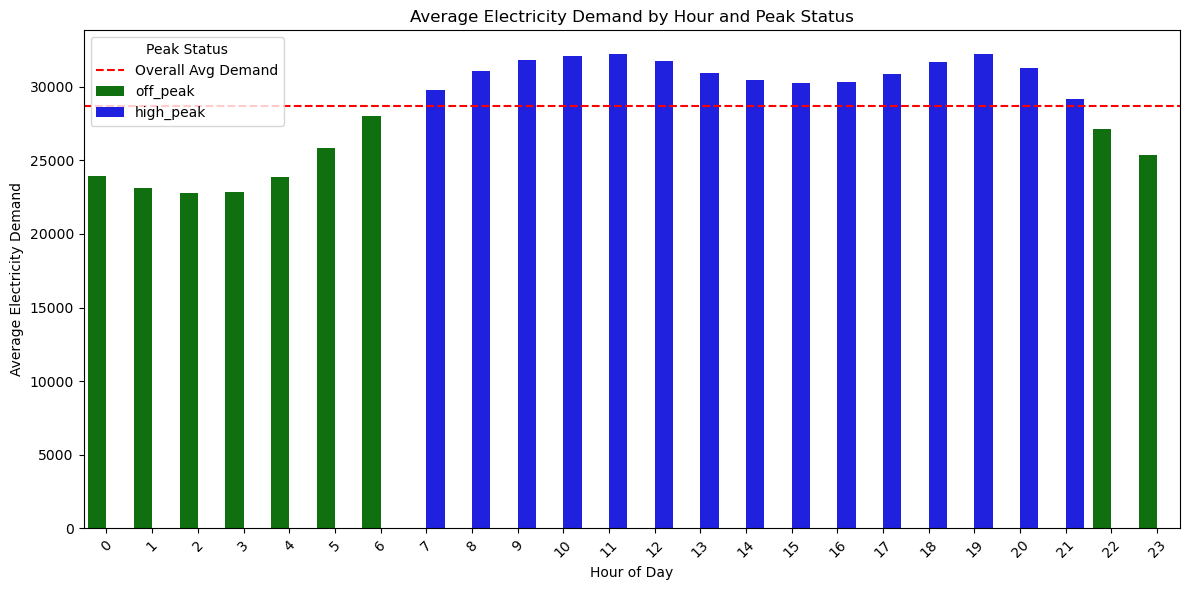

In [24]:
hourly_avg_demand = df4.groupby(df4['time'].dt.hour)['total load actual'].mean().reset_index()
hourly_avg_demand.columns = ['hour', 'avg_electricity_demand']

# Calculate overall average demand across all hours
overall_avg_demand = df4['total load actual'].mean()

# Function to categorize peak status based on overall average demand
def categorize_time(hour, overall_avg_demand):
    if hour > overall_avg_demand:
        return 'high_peak'
    else:
        return 'off_peak'

# Apply categorization function to create 'peak_status' column
hourly_avg_demand['peak_status'] = hourly_avg_demand['avg_electricity_demand'].apply(lambda demand: categorize_time(demand, overall_avg_demand))

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for average electricity demand by hour and peak status
sns.barplot(x='hour', y='avg_electricity_demand', hue='peak_status', data=hourly_avg_demand, palette=['green', 'blue'])

plt.axhline(overall_avg_demand, color='red', linestyle='--', label='Overall Avg Demand')

plt.title('Average Electricity Demand by Hour and Peak Status')
plt.xlabel('Hour of Day')
plt.ylabel('Average Electricity Demand')
plt.legend(title='Peak Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Electricity demand tends to be higher during peak hours (high_peak status) compared to off-peak hours throughout the day. This is particularly noticeable during late afternoon and early evening hours, where demand peaks above the overall average demand indicated by the red dashed line.

barplot for counts od weekdays and weekend

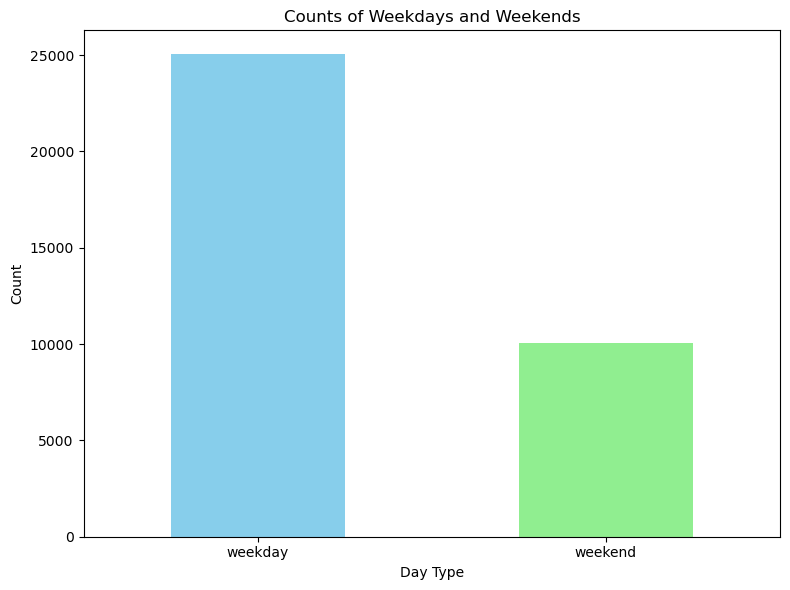

In [25]:
day_type_counts = df4['day_type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
day_type_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])

plt.title('Counts of Weekdays and Weekends')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()


Weekdays have a notably higher count compared to weekends in the dataset, indicating that there are more data points recorded during typical working days compared to weekends.







piechart for average electricity demand distribution by day of week

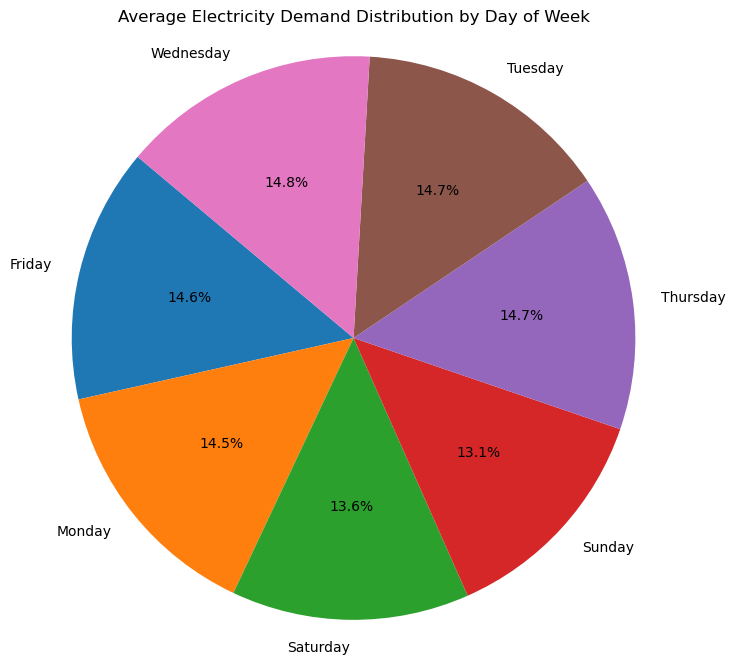

In [26]:
daily_avg_demand = df4.groupby(df4['time'].dt.day_name())['total load actual'].mean().reset_index()
daily_avg_demand.columns = ['day_name', 'avg_electricity_demand']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(daily_avg_demand['avg_electricity_demand'], labels=daily_avg_demand['day_name'], autopct='%1.1f%%', startangle=140)

plt.title('Average Electricity Demand Distribution by Day of Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart visually represents the distribution of average electricity demand across different days of the week.

barplot for calcualte the number od days in each month

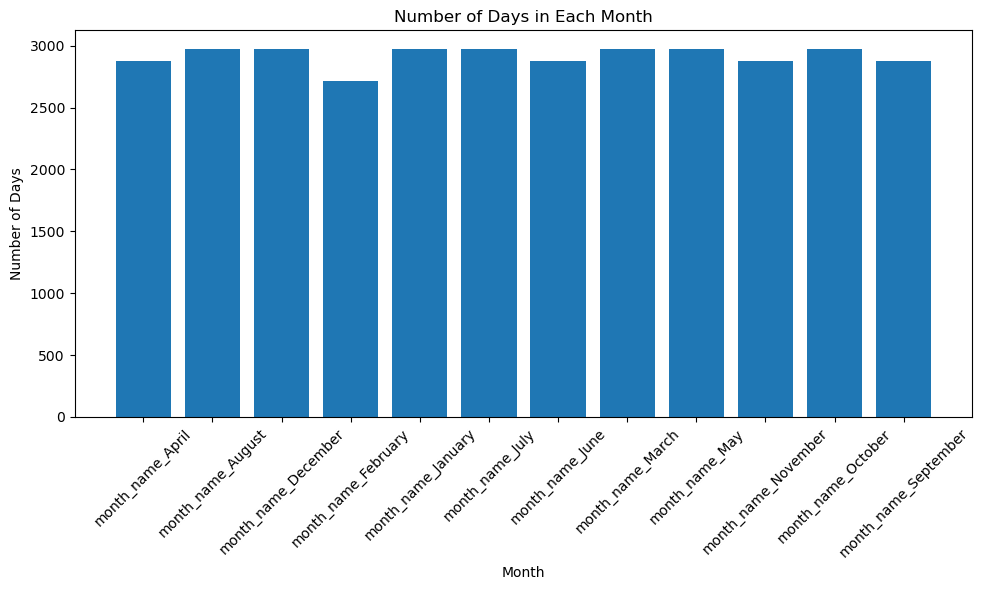

In [27]:
month_count = df4.filter(like='month_name_').sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(month_count.index, month_count.values)

plt.title('Number of Days in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot illustrates the variation in the number of days across different months, indicating potential seasonal patterns or variations in data collection over time.

lineplot for Total Load Actual for Each Month

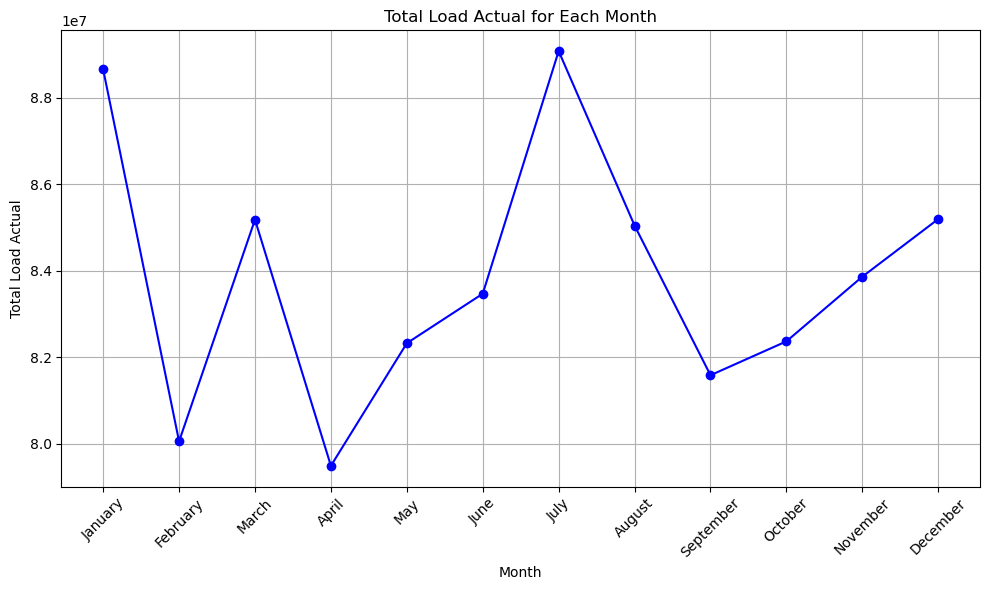

In [28]:
df4['month_name'] = df4['time'].dt.month_name()

# Calculate the total load actual for each month
monthly_load = df4.groupby('month_name')['total load actual'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_load.index, monthly_load.values, marker='o', linestyle='-', color='b')

plt.title('Total Load Actual for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Load Actual')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

he plot shows how electricity demand varies throughout the year, with potential peaks during certain months indicating higher energy consumption periods, likely influenced by seasonal factors such as weather conditions or economic activities.







Histogram

C:\Users\Prachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


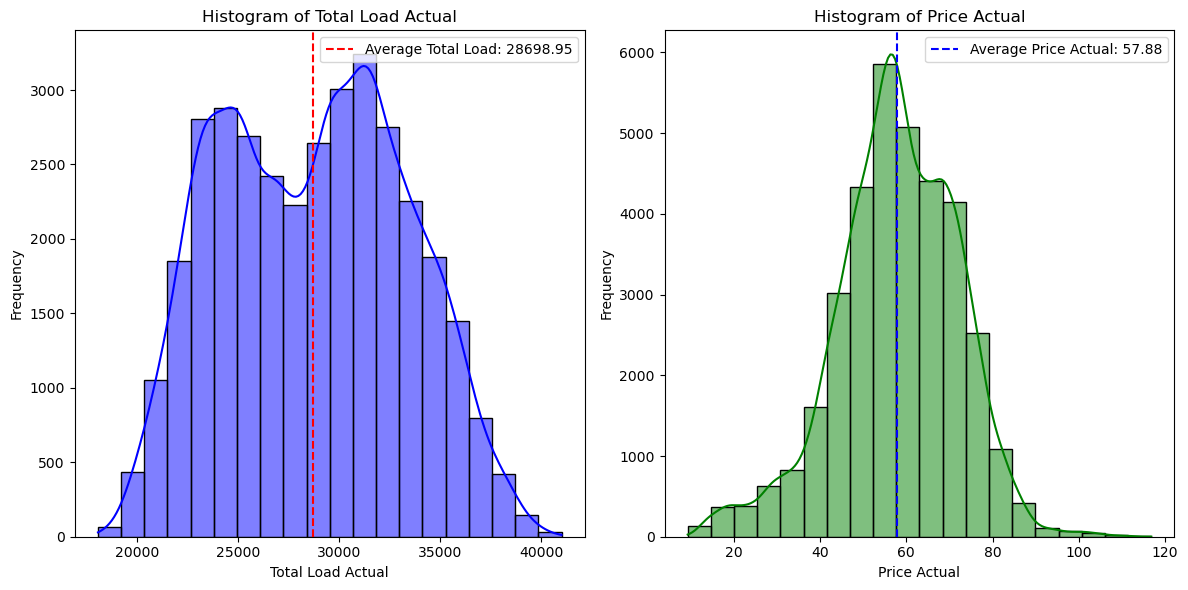

In [29]:
avg_total_load = df4['total load actual'].mean()
avg_price_actual = df4['price actual'].mean()

# Plotting histograms
plt.figure(figsize=(12, 6))

# Histogram for 'total load actual'
plt.subplot(1, 2, 1)
sns.histplot(df4['total load actual'], bins=20, kde=True, color='blue')
plt.axvline(avg_total_load, color='red', linestyle='--', label=f'Average Total Load: {avg_total_load:.2f}')
plt.title('Histogram of Total Load Actual')
plt.xlabel('Total Load Actual')
plt.ylabel('Frequency')
plt.legend()

# Histogram for 'price actual'
plt.subplot(1, 2, 2)
sns.histplot(df4['price actual'], bins=20, kde=True, color='green')
plt.axvline(avg_price_actual, color='blue', linestyle='--', label=f'Average Price Actual: {avg_price_actual:.2f}')
plt.title('Histogram of Price Actual')
plt.xlabel('Price Actual')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

These histograms reveal that the distribution of total electricity load shows a moderate skew towards higher values, while the distribution of actual prices appears relatively symmetric with a slight tail towards higher prices.

correlation matrix

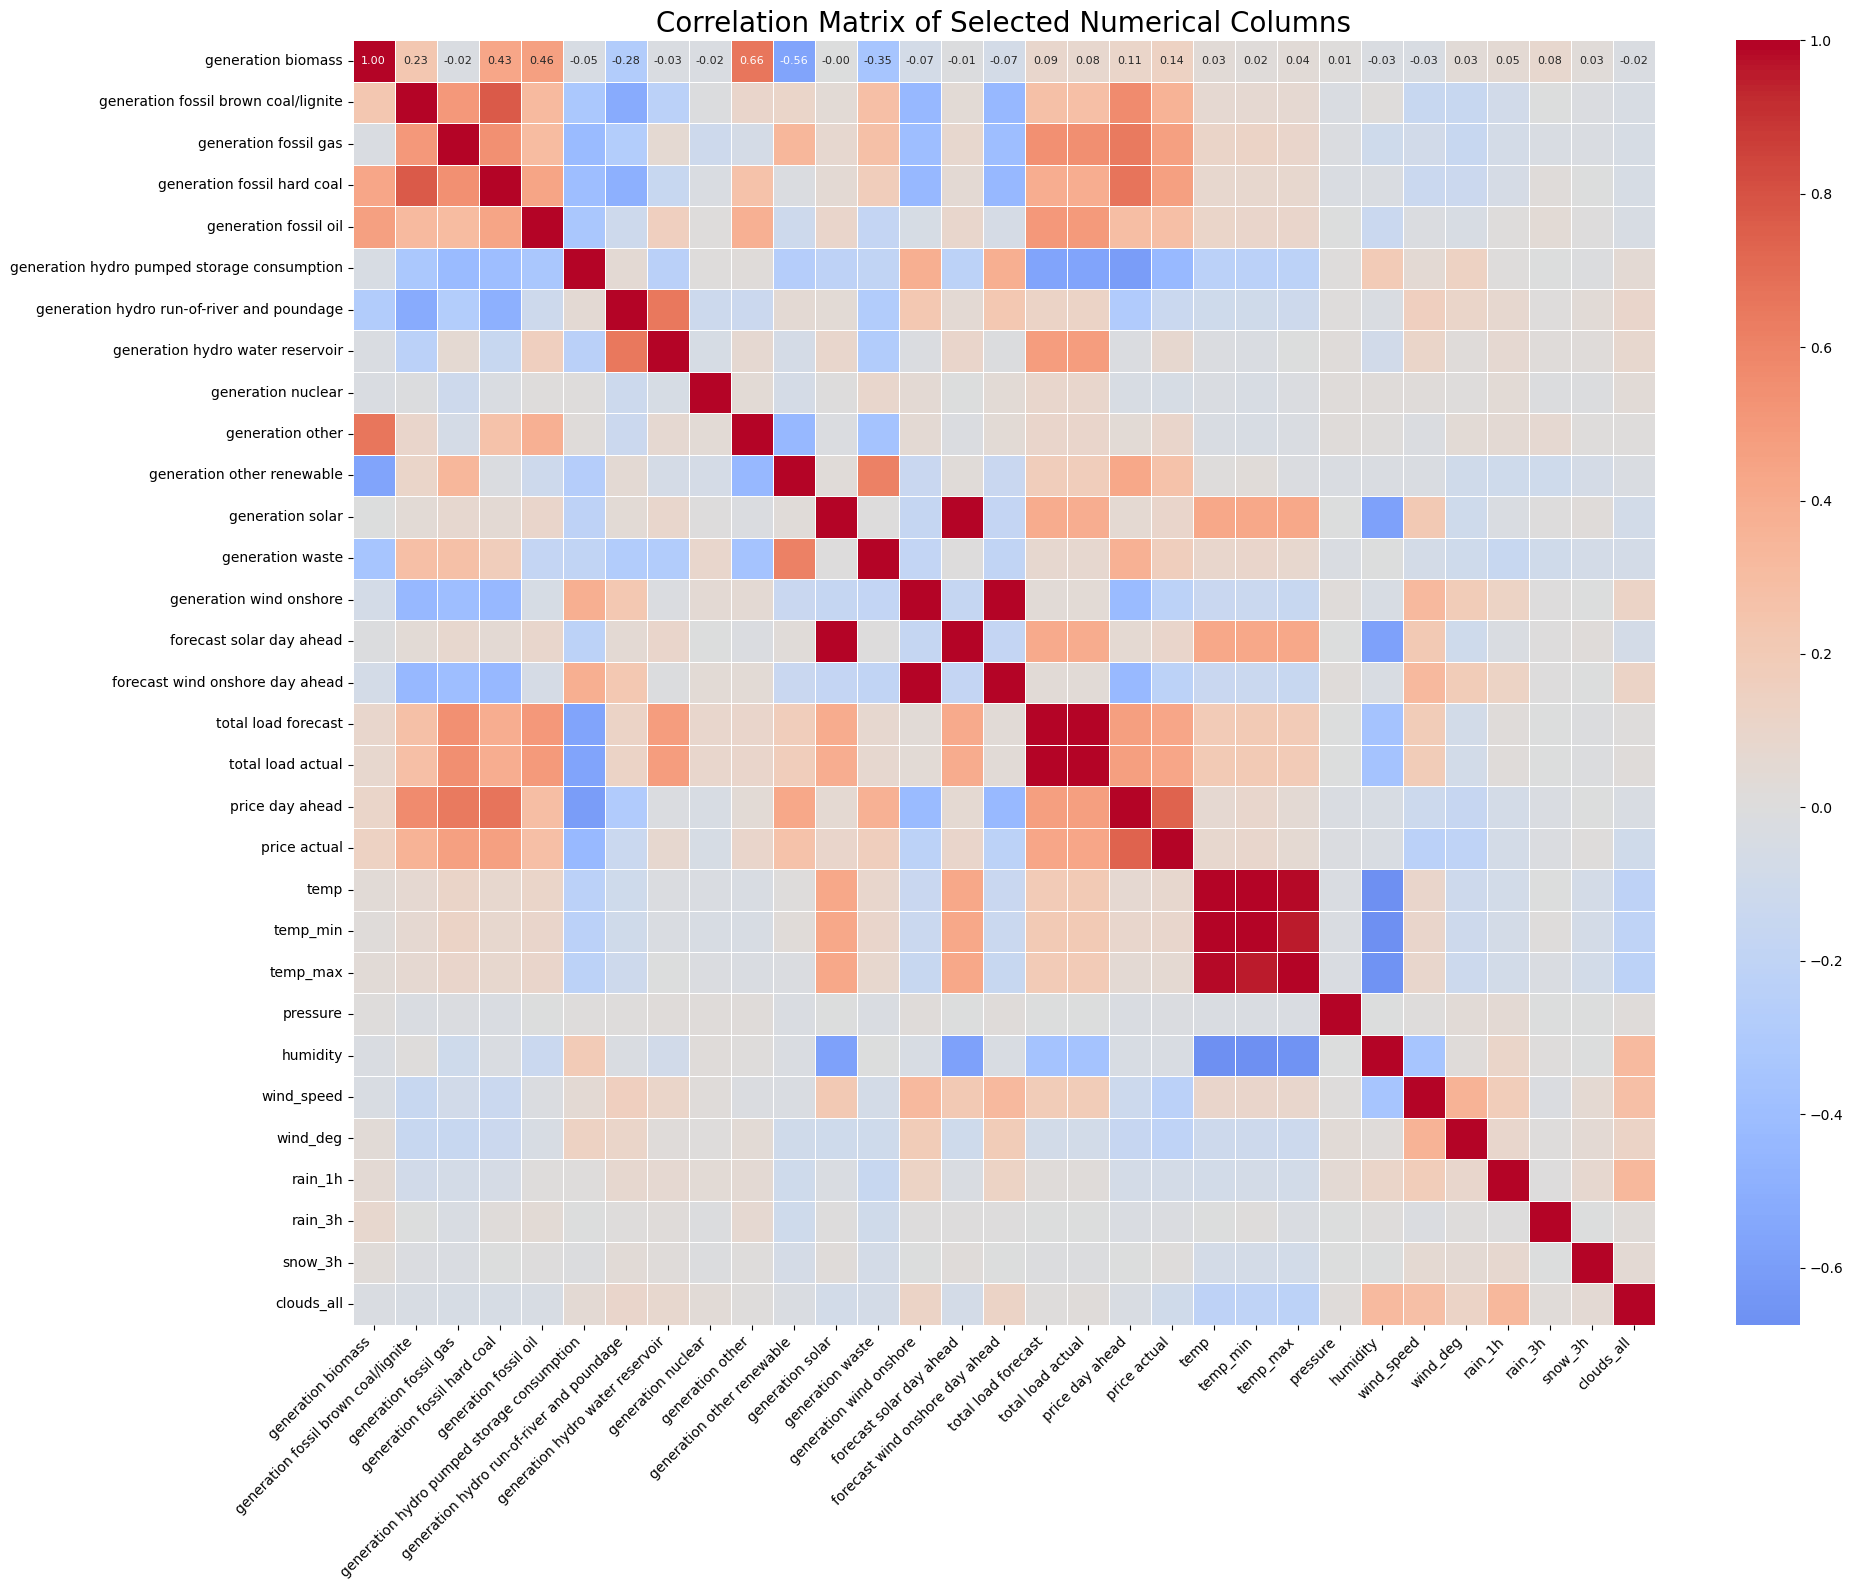

In [30]:
numerical_columns = [
    'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 
    'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 
    'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 
    'generation other', 'generation other renewable', 'generation solar', 'generation waste', 
    'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead', 
    'total load forecast', 'total load actual', 'price day ahead', 'price actual', 'temp', 'temp_min', 
    'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all'
]

# Compute correlation matrix
correlation_matrix = df4[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    center=0, 
    linewidths=0.5, 
    annot_kws={"size": 8}
)
plt.title('Correlation Matrix of Selected Numerical Columns', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

The correlation heatmap reveals strong positive correlations between forecasted and actual total loads, indicating accurate predictions. Conversely, variables like temperature and humidity show weaker relationships, suggesting less direct influence on electricity demand.positive correlations between forecasted and actual prices, implying effective forecasting accuracy.

<span style="font-size: larger;">Build the Model</span>.

linear regression model for total load actual

selecting the features from correlation matrix

In [31]:
# Define the threshold for selecting features
threshold = 0.2

# Get the correlation values with the target variable
target_corr = correlation_matrix['total load actual']  # Replace 'target' with your target variable name

# Select features with high correlation to the target variable
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
selected_features.remove('total load actual')  # Remove the target variable itself

print("Selected features based on correlation with target:", selected_features)


Selected features based on correlation with target: ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro water reservoir', 'generation solar', 'forecast solar day ahead', 'total load forecast', 'price day ahead', 'price actual', 'temp', 'temp_min', 'humidity']


splitting the model and initializing the model

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro water reservoir', 'generation solar', 'forecast solar day ahead', 'total load forecast', 'price day ahead', 'price actual', 'temp', 'temp_min', 'humidity', 'weekday', 'weekend', 'day_name_Sunday']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)

# Split the temporary training set into actual training and validation sets
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Print the shapes of the datasets
print(f'train dataset shape: {train.shape}')
print(f'validation dataset shape: {validation.shape}')
print(f'test dataset shape: {test.shape}')

# Extract the features and target variables for each set
X_train = train[features]
y_train = train['total load actual']  # Replace 'target' with your actual target variable name

X_validation = validation[features]
y_validation = validation['total load actual']  # Replace 'target' with your actual target variable name

X_test = test[features]
y_test = test['total load actual']  # Replace 'target' with your actual target variable name

# Remove non-numeric columns from X
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_validation_numeric = X_validation.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Transform the validation and test data using the same scaler
X_validation_scaled = scaler.transform(X_validation_numeric)
X_test_scaled = scaler.transform(X_test_numeric)



train dataset shape: (12272, 64)
validation dataset shape: (12272, 64)
test dataset shape: (10520, 64)


In [33]:
# Linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Prediction on the validation set
y_pred_validation = model.predict(X_validation_scaled)

# Model evaluation on validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
rmse_validation = np.sqrt(mse_validation)
r2_validation = r2_score(y_validation, y_pred_validation)
mape_validation = mean_absolute_percentage_error(y_validation, y_pred_validation)

# Calculate adjusted R-squared for the validation set
n_val = X_validation.shape[0]
p_val = X_validation.shape[1]
adj_r2_validation = 1 - ((1 - r2_validation) * (n_val - 1) / (n_val - p_val - 1))

# Print the evaluation metrics
print(f'MSE on validation set: {mse_validation}')
print(f'RMSE on validation set: {rmse_validation}')
print(f'R2 on validation set: {r2_validation}')
print(f'MAPE on validation set: {mape_validation}')
print(f'Adjusted R2 on validation set: {adj_r2_validation}')


MSE on validation set: 190607.0213065661
RMSE on validation set: 436.58564028901145
R2 on validation set: 0.9909922831463154
MAPE on validation set: 0.010853698468666814
Adjusted R2 on validation set: 0.9909797867217591


selecting the features for price actual target value

In [34]:
# Define the threshold for selecting features
threshold = 0.2

# Get the correlation values with the target variable
target_corr = correlation_matrix['price actual']  # Replace 'target' with your target variable name

# Select features with high correlation to the target variable
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
selected_features.remove('price actual')  # Remove the target variable itself

print("Selected features based on correlation with target:", selected_features)


Selected features based on correlation with target: ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'wind_speed', 'wind_deg']


splitting the data and initialize the model for price actual

In [35]:


# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual','price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)

# Split the temporary training set into actual training and validation sets
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Print the shapes of the datasets
print(f'train dataset shape: {train.shape}')
print(f'validation dataset shape: {validation.shape}')
print(f'test dataset shape: {test.shape}')

# Extract the features and target variables for each set
X_train = train[features]
y_train = train['price actual']  # Replace 'target' with your actual target variable name

X_validation = validation[features]
y_validation = validation['price actual']  # Replace 'target' with your actual target variable name

X_test = test[features]
y_test = test['price actual']  # Replace 'target' with your actual target variable name

# Remove non-numeric columns from X
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_validation_numeric = X_validation.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Transform the validation and test data using the same scaler
X_validation_scaled = scaler.transform(X_validation_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


train dataset shape: (12272, 64)
validation dataset shape: (12272, 64)
test dataset shape: (10520, 64)


In [36]:
# Linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Prediction on the validation set
y_pred_validation = model.predict(X_validation_scaled)

# Model evaluation on validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
rmse_validation = np.sqrt(mse_validation)
r2_validation = r2_score(y_validation, y_pred_validation)
mape_validation = mean_absolute_percentage_error(y_validation, y_pred_validation)

# Calculate adjusted R-squared for the validation set
n_val = X_validation.shape[0]
p_val = X_validation.shape[1]
adj_r2_validation = 1 - ((1 - r2_validation) * (n_val - 1) / (n_val - p_val - 1))

# Print the evaluation metrics
print(f'MSE on validation set: {mse_validation}')
print(f'RMSE on validation set: {rmse_validation}')
print(f'R2 on validation set: {r2_validation}')
print(f'MAPE on validation set: {mape_validation}')
print(f'Adjusted R2 on validation set: {adj_r2_validation}')


MSE on validation set: 75.6820969610388
RMSE on validation set: 8.699545790501869
R2 on validation set: 0.6237121078016563
MAPE on validation set: 0.12425264010983422
Adjusted R2 on validation set: 0.6232208302598226


RANDOM FOREST MODEL

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro water reservoir', 'generation solar', 'forecast solar day ahead', 'total load forecast', 'price day ahead', 'price actual', 'temp', 'temp_min', 'humidity', 'weekday', 'day_name_Sunday','month_name_December','month_name_January','month_name_July']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train = train[features]
y_train = train['total load actual']

X_validation = validation[features]
y_validation = validation['total load actual']

X_test = test[features]
y_test = test['total load actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)



In [50]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_validation = model.predict(X_validation_scaled)

# Evaluate the model
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
r2_validation = r2_score(y_validation, y_pred_validation)
adjusted_r2_validation = 1 - (1 - r2_validation) * (len(y_validation) - 1) / (len(y_validation) - X_validation.shape[1] - 1)
mape_validation = mean_absolute_percentage_error(y_validation, y_pred_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
print(f'Validation for total load actual')
print(f'Validation MAE for load: {mae_validation}')
print(f'Validation R² for load : {r2_validation}')
print(f'Validation Adjusted R² for load: {adjusted_r2_validation}')
print(f'Validation MAPE for load: {mape_validation}')
print(f'Validation RMSE for load: {rmse_validation}')
print()

# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Test for total load actual')
print(f'Test MAE for load: {mae_test}')
print(f'Test R² for load: {r2_test}')
print(f'Test Adjusted R² for load: {adjusted_r2_test}')
print(f'Test MAPE for load: {mape_test}')
print(f'Test RMSE for load: {rmse_test}')


Validation for total load actual
Validation MAE for load: 308.02387141460235
Validation R² for load : 0.9911805068455553
Validation Adjusted R² for load: 0.9911668298646595
Validation MAPE for load: 0.010706272705835565
Validation RMSE for load: 432.00015026983124

Test for total load actual
Test MAE for load: 310.8393935361217
Test R² for load: 0.9901086241031418
Test Adjusted R² for load: 0.9900907254229475
Test MAPE for load: 0.010831899183003318
Test RMSE for load: 453.3462214179317


RANDOM FOREST FOR PRICE

In [51]:

# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual','price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train = train[features]
y_train = train['price actual']

X_validation = validation[features]
y_validation = validation['price actual']

X_test = test[features]
y_test = test['price actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)


In [52]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_validation = model.predict(X_validation_scaled)

# Evaluate the model
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
r2_validation = r2_score(y_validation, y_pred_validation)
adjusted_r2_validation = 1 - (1 - r2_validation) * (len(y_validation) - 1) / (len(y_validation) - X_validation.shape[1] - 1)
mape_validation = mean_absolute_percentage_error(y_validation, y_pred_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
print(f'Validation for price actual')
print(f'Validation MAE for price: {mae_validation}')
print(f'Validation R² for price: {r2_validation}')
print(f'Validation Adjusted R² for price: {adjusted_r2_validation}')
print(f'Validation MAPE for price: {mape_validation}')
print(f'Validation RMSE for price: {rmse_validation}')
print()

# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Test for price actual')
print(f'Test MAE for price: {mae_test}')
print(f'Test R² for price: {r2_test}')
print(f'Test Adjusted R² for price: {adjusted_r2_test}')
print(f'Test MAPE for price: {mape_test}')
print(f'Test RMSE for price: {rmse_test}')


Validation for price actual
Validation MAE for price: 4.34381076434159
Validation R² for price: 0.7713128759318784
Validation Adjusted R² for price: 0.7710143044112672
Validation MAPE for price: 0.08907418353557695
Validation RMSE for price: 6.781992617691375

Test for price actual
Test MAE for price: 4.429652718631179
Test R² for price: 0.7661626447726805
Test Adjusted R² for price: 0.765806422961423
Test MAPE for price: 0.09167986385072734
Test RMSE for price: 6.9029589169323256
